In [25]:
import sys
sys.path.append("../src/")
from clean_data import df_data_cleaned, df_domains_location_cleaned, df_traffic_cleaned
df_data_cleaned
df_domains_location_cleaned
df_traffic_cleaned

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs,CompositeScore
0,1,1,googlecom,com,471274,2151358,googlecom,com,1,1,471248,2147402,2.622633e+06
1,2,2,facebookcom,com,465424,2250631,facebookcom,com,2,2,465297,2247135,2.716056e+06
2,3,3,youtubecom,com,420579,1852995,youtubecom,com,3,3,420483,1848940,2.273574e+06
3,4,4,twittercom,com,404985,1757127,twittercom,com,4,4,404998,1753939,2.162112e+06
4,5,5,instagramcom,com,364746,1598085,instagramcom,com,5,5,364618,1594892,1.962831e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,485324,kireiecom,com,222,280,kireiecom,com,-1,-1,-1,-1,5.020000e+02
999996,999997,485325,mtlockcom,com,222,280,mtlockcom,com,952633,461429,232,284,5.020000e+02
999997,999998,485326,pinkwatercom,com,222,280,pinkwatercom,com,-1,-1,-1,-1,5.020000e+02
999998,999999,485327,soderhomescom,com,222,280,soderhomescom,com,-1,-1,-1,-1,5.020000e+02


Top and Bottom 10 Websites by News Article Count

In [26]:
# Group by website and count articles
article_counts = df_data_cleaned['source_name'].value_counts()
# Top 10 websites with most articles
top_10_websites = article_counts.head(10)
bottom_10_websites = article_counts.tail(10)
# Display results
print("Top 10 Websites with Most Articles:")
print(top_10_websites)
print("\nBottom 10 Websites with Least Articles:")
print(bottom_10_websites)

Top 10 Websites with Most Articles:
source_name
etf daily news        16631
the times of india     7629
globenewswire          5485
forbes                 4423
biztoccom              3968
bbc news               3342
globalsecurityorg      3093
business insider       2746
abc news               2188
marketscreenercom      1948
Name: count, dtype: int64

Bottom 10 Websites with Least Articles:
source_name
bunkhistoryorg         1
pew research center    1
visiblecom             1
spaceintelreportcom    1
whitehousegov          1
netgatecom             1
ugaedu                 1
evertpotcom            1
scitechdaily           1
powerdnscom            1
Name: count, dtype: int64


/tmp/ipykernel_756531/1852882099.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_websites.values, y=top_10_websites.index, palette="viridis")


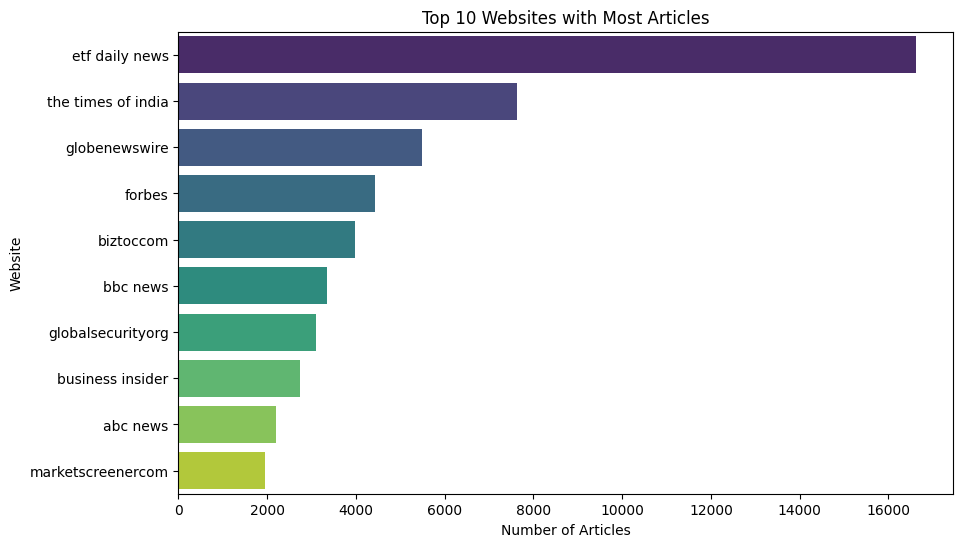

/tmp/ipykernel_756531/1852882099.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_websites.values, y=bottom_10_websites.index, palette="magma")


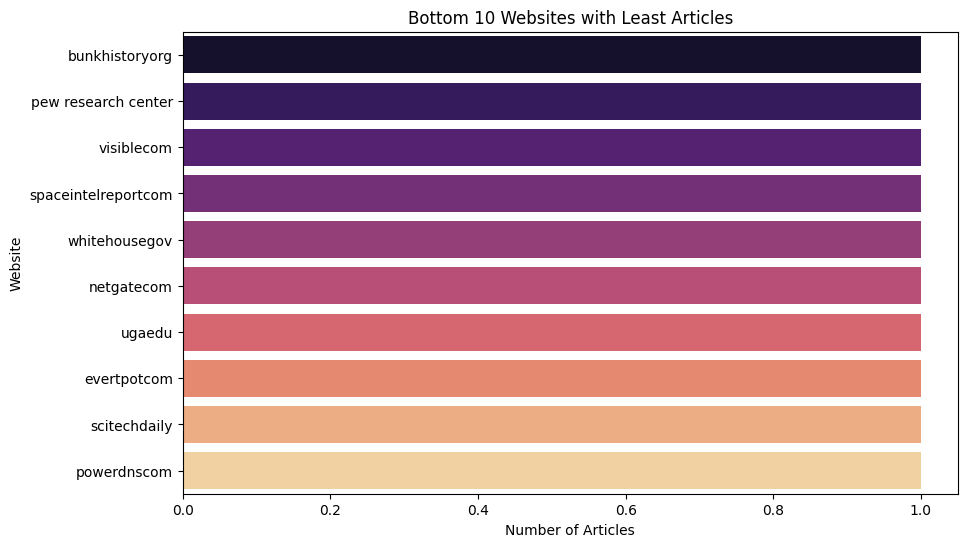

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the Top 10 Websites
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_websites.values, y=top_10_websites.index, palette="viridis")
plt.title("Top 10 Websites with Most Articles")
plt.xlabel("Number of Articles")
plt.ylabel("Website")
plt.show()

# Plot the Bottom 10 Websites
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_10_websites.values, y=bottom_10_websites.index, palette="magma")
plt.title("Bottom 10 Websites with Least Articles")
plt.xlabel("Number of Articles")
plt.ylabel("Website")
plt.show()


In [28]:
df_traffic_cleaned['CompositeScore'] = (
    (1 / df_traffic_cleaned['GlobalRank'].replace(0, 1)) +  # Inverse GlobalRank, avoid division by zero
    df_traffic_cleaned['RefSubNets'] +
    df_traffic_cleaned['RefIPs']
)

# Sort websites by the composite score in descending order
top_websites = df_traffic_cleaned.sort_values(by='CompositeScore', ascending=False)

# Display top 10 websites with highest visitor traffic
top_10_websites = top_websites.head(10)

print("Top 10 Websites with Highest Visitor Traffic:")
print(top_10_websites[['Domain', 'CompositeScore']])

Top 10 Websites with Highest Visitor Traffic:
                 Domain  CompositeScore
1           facebookcom    2.716056e+06
0             googlecom    2.622633e+06
2            youtubecom    2.273574e+06
3            twittercom    2.162112e+06
4          instagramcom    1.962831e+06
5           linkedincom    1.656473e+06
8   googletagmanagercom    1.117958e+06
9          wikipediaorg    1.077996e+06
6              applecom    1.068381e+06
10         wordpressorg    1.066657e+06


/tmp/ipykernel_756531/2065230069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CompositeScore', y='Domain', data=top_10_websites, palette='viridis')


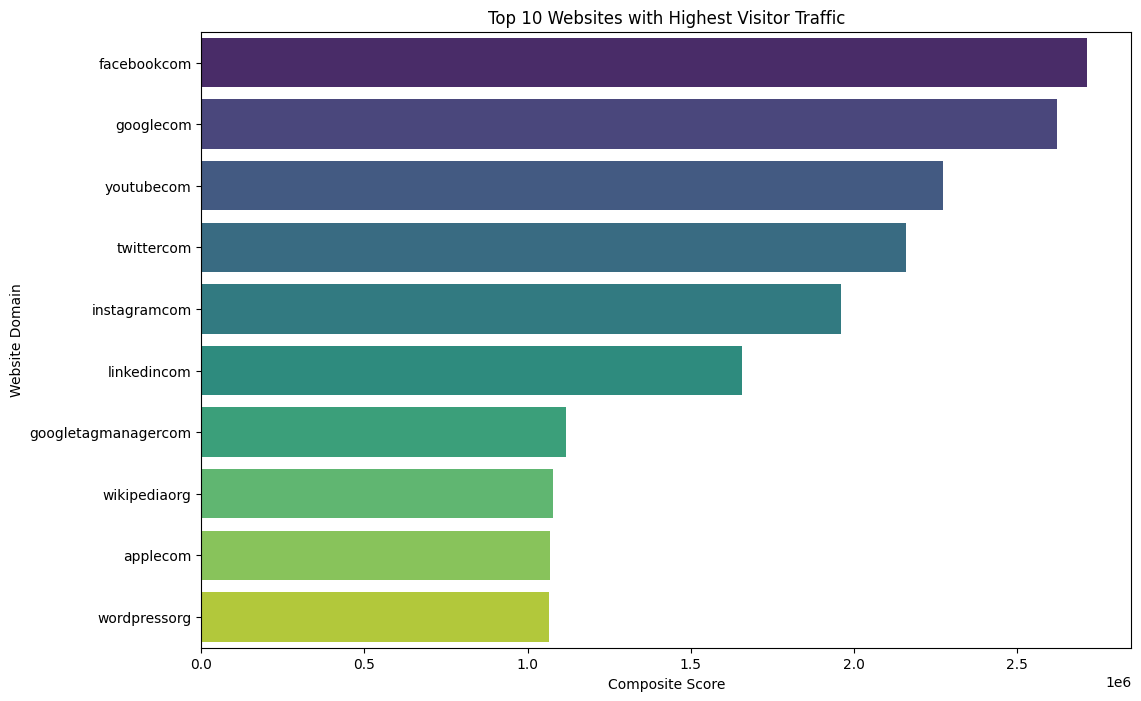

In [29]:
# Plot the Top 10 Websites by Composite Score
plt.figure(figsize=(12, 8))

# Create a barplot with 'Domain' on the y-axis and 'CompositeScore' on the x-axis
sns.barplot(x='CompositeScore', y='Domain', data=top_10_websites, palette='viridis')

# Add titles and labels
plt.title('Top 10 Websites with Highest Visitor Traffic')
plt.xlabel('Composite Score')
plt.ylabel('Website Domain')

# Display the plot
plt.show()

Countries with Many Articles Written About Them

In [30]:
import pandas as pd
# Merge the two DataFrames on source_name and SourceCommonName
merged_df = pd.merge(df_data_cleaned, df_domains_location_cleaned, left_on='source_name', right_on='SourceCommonName', how='left')

# Define a function to check if content mentions the country
def mentions_country(text, country):
    if pd.isna(text) or pd.isna(country):
        return False
    return country.lower() in text.lower()

# Create a column for whether an article mentions the country
merged_df['mentions_country'] = merged_df.apply(
    lambda row: any(
        mentions_country(row[column], row['Country'])
        for column in ['title', 'content', 'full_content']
    ), axis=1
)

# Count articles mentioning each country
country_article_counts = merged_df[merged_df['mentions_country']].groupby('Country').size()

print("Number of Articles Mentioning Each Country:")
print(country_article_counts)


Number of Articles Mentioning Each Country:
Country
australia           1
china               8
germany             1
greece             10
india               3
iran                1
ireland            50
israel              2
japan               9
malaysia            4
romania             4
russia              2
taiwan              1
thailand            1
united states    1123
vietnam             3
dtype: int64


/tmp/ipykernel_756531/3849374118.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ArticleCount', y='Country', data=country_article_counts, palette='viridis')


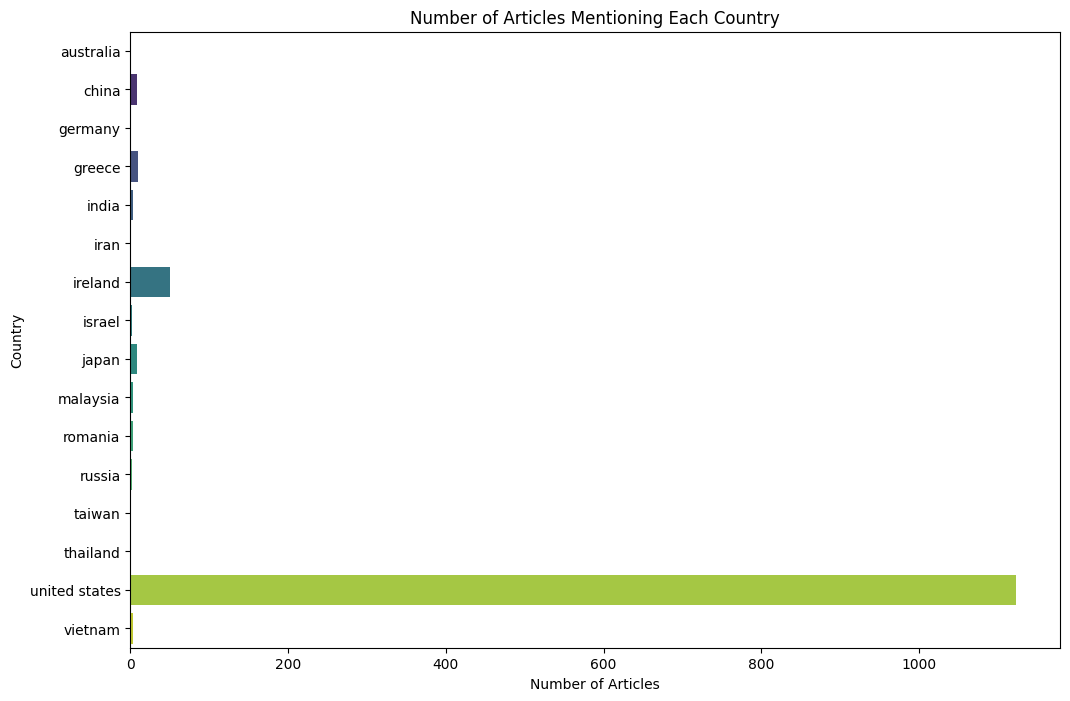

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
country_article_counts = country_article_counts.reset_index(name='ArticleCount')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='ArticleCount', y='Country', data=country_article_counts, palette='viridis')
plt.title('Number of Articles Mentioning Each Country')
plt.xlabel('Number of Articles')
plt.ylabel('Country')
plt.show()
